## Lesson 1: State Vectors

In [1]:
from numpy import array

#Initializes two vectors
ket0 = array([1,0])
ket1 = array([0,1])

ket0/2 + ket1/2

array([0.5, 0.5])

In [2]:
M1 = array([ [1,1], [0,0] ])
M2 = array([ [1,1], [1,0] ])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

## Matrix Multiplication

In [3]:
from numpy import matmul

print(f'Multiplying M1 * ket1 : {matmul(M1,ket1)}')
print(f'Multiplying M1 * M2: {matmul(M1, M2)}')
print(f'Multiplying M2 * M1: {matmul(M2, M1)}')

Multiplying M1 * ket1 : [1 0]
Multiplying M1 * M2: [[2 1]
 [0 0]]
Multiplying M2 * M1: [[1 1]
 [1 1]]


## Displaying Quantum State Vectors

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

#Defining state vectors
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [9]:
#Display vectors
display(u.draw("latex"))
print(f'V drawn in text: {v.draw("text")}')

<IPython.core.display.Latex object>

V drawn in text: [ 0.33333333+0.66666667j,-0.66666667+0.j        ]


In [10]:
#Check if state vectors are valid (Euclidean Norm == 1)
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

## Measure Quantum State

In [14]:
#Single measure - can change each time it is ran
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 571, '1': 429}

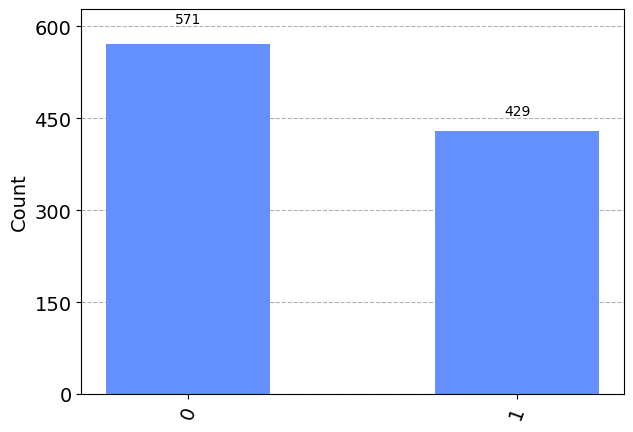

In [15]:
#Simulate multiple measurements
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

## Performing operations with Operator and Statevector

In [19]:
from qiskit.quantum_info import Operator

X = Operator([ [0,1], [1,0] ])
Y = Operator([ [0, -1.j], [1.j, 0] ])
Z = Operator([ [1,0], [0, -1] ])
H = Operator([ [1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)] ])
S = Operator([ [1,0], [0,1.j] ])
T = Operator([ [1,0], [0, (1+1.j)/sqrt(2)] ])

v = Statevector([1,0])

v = v.evolve(H)
print("H gate")
display(v.draw("latex"))

v = v.evolve(T)
print("H -> T")
display(v.draw("latex"))

v = v.evolve(H)
print("H -> T -> H")
display(v.draw("latex"))

v = v.evolve(T)
print("H -> T -> H -> T")
display(v.draw("latex"))

v = v.evolve(Z)
print("H -> T -> H -> T -> Z")
display(v.draw("latex"))

H gate


<IPython.core.display.Latex object>

H -> T


<IPython.core.display.Latex object>

H -> T -> H


<IPython.core.display.Latex object>

H -> T -> H -> T


<IPython.core.display.Latex object>

H -> T -> H -> T -> Z


<IPython.core.display.Latex object>

In [20]:
#Converting this to a quantum circuit
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [22]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

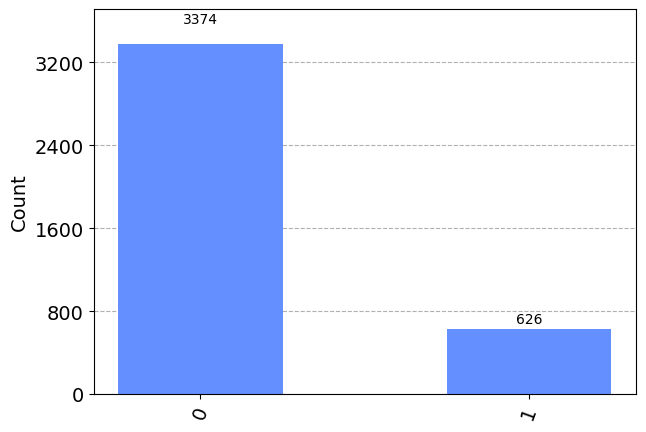

In [23]:
#Simulate the result
statistics = v.sample_counts(4000)
plot_histogram(statistics)